# 1. TRATAMIENTO DATASET

En Drive he creado una carpeta para el proyecto llamada keepcoding_NLP donde guardar todos los dataset y archivos necesarios en el proyecto.

He decidido usar el dataset de reviews llamado sports_and_outdoors.

## 1.1. Conectar Drive

In [1]:
# Conectar con el almacenamiento de GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2 Convertir dataset en data frame

Función para convertir el dataset en un data frame.

In [2]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')



Cargar el dataset como dataframe

In [3]:
df_sports = getDF('/content/drive/MyDrive/keepcoding_NLP/Sports_and_Outdoors_5.json.gz')

Comprobar que se ha cargado correctamente.

In [4]:
df_sports.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,vote,image
0,5.0,True,"06 3, 2015",A180LQZBUWVOLF,0000032034,Michelle A,What a spectacular tutu! Very slimming.,Five Stars,1433289600,NaN,NaN,NaN
1,1.0,True,"04 1, 2015",ATMFGKU5SVEYY,0000032034,Crystal R,What the heck? Is this a tutu for nuns? I know...,Is this a tutu for nuns?!,1427846400,NaN,NaN,NaN
2,5.0,True,"01 13, 2015",A1QE70QBJ8U6ZG,0000032034,darla Landreth,Exactly what we were looking for!,Five Stars,1421107200,NaN,NaN,NaN
3,5.0,True,"12 23, 2014",A22CP6Z73MZTYU,0000032034,L. Huynh,I used this skirt for a Halloween costume and ...,I liked that the elastic waist didn't dig in (...,1419292800,NaN,NaN,NaN
4,4.0,True,"12 15, 2014",A22L28G8NRNLLN,0000032034,McKenna,This is thick enough that you can't see throug...,This is thick enough that you can't see throug...,1418601600,NaN,NaN,NaN


## 1.3. Análisis exploratorio

Comprobar las columnas que tiene, tipo de datos y número de registros.

In [5]:
df_sports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2839940 entries, 0 to 2839939
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   reviewerName    object 
 6   reviewText      object 
 7   summary         object 
 8   unixReviewTime  int64  
 9   style           object 
 10  vote            object 
 11  image           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 262.7+ MB


Comprobar si hay columnas con nulos.

In [6]:
df_sports.isna().any()

overall           False
verified          False
reviewTime        False
reviewerID        False
asin              False
reviewerName       True
reviewText         True
summary            True
unixReviewTime    False
style              True
vote               True
image              True
dtype: bool

Comprobar el número de registros nulos.

In [7]:
df_sports.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName          279
reviewText           1114
summary               611
unixReviewTime          0
style             1242772
vote              2461060
image             2775405
dtype: int64

Comprobar como son las columnas reviewText y summary.

In [8]:
df_sports['reviewText'][1]

'What the heck? Is this a tutu for nuns? I know you can cut it but STILL. Also there aren\'t several layers of the tutu making it "poof out" It just lays flat. Needless to say it was returned.'

In [9]:
df_sports['summary'][1]

'Is this a tutu for nuns?!'

Vamos a trabajar con la columna reviewText:

a) Eliminar la reviews nulas.

b) Seleccionar las características que necesitamos

## 1.4. Filtro las review no nulas

In [10]:
df_sports= df_sports[df_sports['reviewText'].notnull()]

df_sports.isnull().any()


overall           False
verified          False
reviewTime        False
reviewerID        False
asin              False
reviewerName       True
reviewText        False
summary            True
unixReviewTime    False
style              True
vote               True
image              True
dtype: bool

## 1.5 Selección de características.

Nos quedamos con "overall" porque es la columna de sentimientos y con la columna de reviewText.

In [11]:
df_sports = df_sports[['overall', 'reviewText']]
df_sports.head()

,overall,reviewText
0,5.0,What a spectacular tutu! Very slimming.
1,1.0,What the heck? Is this a tutu for nuns? I know...
2,5.0,Exactly what we were looking for!
3,5.0,I used this skirt for a Halloween costume and ...
4,4.0,This is thick enough that you can't see throug...


Renombrar columnas.


In [12]:
df_sports.columns = ['sentimiento', 'review']

## 1.6. Distribución de reviews por número de estrellas


In [13]:
df_sports['sentimiento'].value_counts()

sentimiento
5.0    1920488
4.0     495400
3.0     210180
1.0     111129
2.0     101629
Name: count, dtype: int64

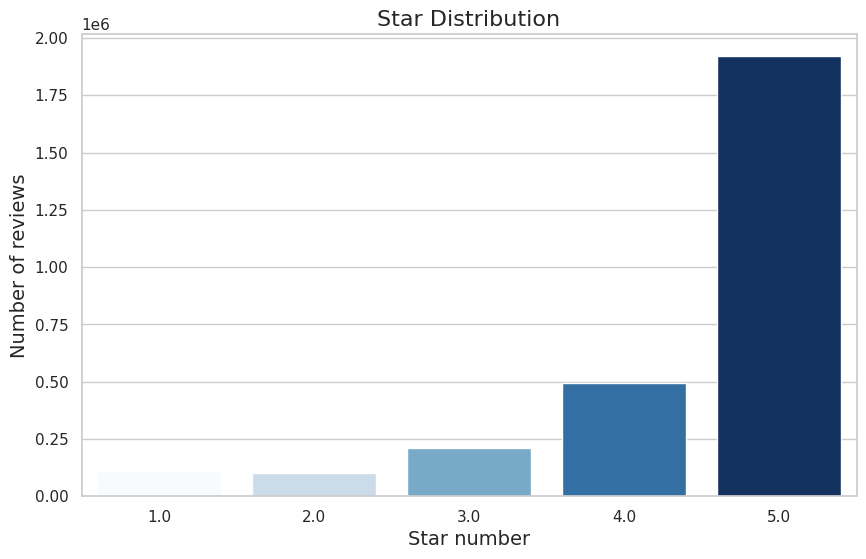

In [14]:
# Visualización
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración de estilo para los gráficos
sns.set(style="whitegrid")

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sentimiento', data=df_sports, palette='Blues', hue='sentimiento', dodge=False, legend=False)

# Añadir etiquetas y título
ax.set_title('Star Distribution', fontsize=16)
ax.set_xlabel('Star number', fontsize=14)
ax.set_ylabel('Number of reviews', fontsize=14)

# Mostrar el gráfico
plt.show()


Obesrvamos que hay muchas con alta valoración vamos a dividir separando las columnas con 4 y 5 estrellas y por otro lado las de 1, 2 y 3 con 15000 registros en cada caso para un dataset inicial de 30000 registros.

## 1.7. Dividir el dataset en un subset

In [15]:
# Dividir el DataFrame en un subset
# Filtrar los dos grupos
group_45 = df_sports[df_sports['sentimiento'].isin([4.0, 5.0])]
group_123 = df_sports[df_sports['sentimiento'].isin([1.0, 2.0, 3.0])]

# Tomar una muestra aleatoria de cada grupo tamaño 15000
sample_45 = group_45.sample(n=15000, random_state=1)
sample_123 = group_123.sample(n=15000, random_state=1)

# Concatenar las muestras en un nuevo DataFrame
df_sports_subset = pd.concat([sample_45, sample_123]).reset_index(drop=True)

# Mostrar los resultados
print("Información distribución sentimiento:")
print(df_sports_subset['sentimiento'].value_counts())
print('-----------------------------------------------')
#Comprobar el dataset
df_sports_subset.head()


Información distribución sentimiento:
sentimiento
5.0    11900
3.0     7552
1.0     3832
2.0     3616
4.0     3100
Name: count, dtype: int64
-----------------------------------------------


,sentimiento,review
0,4.0,Perfect size to fit in an emergency preparedne...
1,4.0,Great but wears out pretty quick if used a lot...
2,5.0,Great item that is superbly inexpensive for it...
3,5.0,This is a sturdily built portable practice net...
4,4.0,works good


## 1.8. Guardar el subset

Guardo el subset para usarlo posteriormente.

In [16]:
df_sports_subset.to_csv('/content/drive/MyDrive/keepcoding_NLP/df_sports_subset2.csv', index=False)

# 2. ANALISIS

## 2.1. Instalar modelo spacy

In [17]:
# Instalar librerias y modelos
!pip install -U spacy download en_core_web_sm

## 2.2. Cargar data set: df_sports_subset.csv


In [18]:
import pandas as pd
data_sports = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/df_sports_subset2.csv')

Visualizar que está correctamente cargado

In [19]:
data_sports.head()

,sentimiento,review
0,4.0,Perfect size to fit in an emergency preparedne...
1,4.0,Great but wears out pretty quick if used a lot...
2,5.0,Great item that is superbly inexpensive for it...
3,5.0,This is a sturdily built portable practice net...
4,4.0,works good


Comprobar información del data set

In [20]:
data_sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sentimiento  30000 non-null  float64
 1   review       30000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 468.9+ KB


## 2.3. Ver que tipo de token tenemos

In [21]:
import spacy

# Cargar modelo en ingles pequeño
nlp = spacy.load('en_core_web_sm')

# Función para visulizar en una tabla información de los token
def token_information(doc):
    # Cabecera
    header = '{:<10}{:<10}{:<10}{:<10}{:<20}'.format('Token', 'POS', 'Tag', 'Dep', 'Meaning')
    print(header)
    print('-' * len(header))

    for token in doc:
        meaning = spacy.explain(token.dep_) or 'N/A'
        print('{:<10}{:<10}{:<10}{:<10}{:<20}'.format(token.text, token.pos_, token.tag_, token.dep_, meaning))

# Función para procesar el texto e imprimir lo anterior
def process_and_display_token_info(text):
    doc = nlp(text)
    token_information(doc)

In [22]:
data_sports['review'].head(5).apply(process_and_display_token_info)

Token     POS       Tag       Dep       Meaning             
------------------------------------------------------------
Perfect   ADJ       JJ        amod      adjectival modifier 
size      NOUN      NN        ROOT      root                
to        PART      TO        aux       auxiliary           
fit       VERB      VB        relcl     relative clause modifier
in        ADP       IN        prep      prepositional modifier
an        DET       DT        det       determiner          
emergency NOUN      NN        compound  compound            
preparednessNOUN      NN        compound  compound            
backpack  NOUN      NN        pobj      object of preposition
that      PRON      WDT       dobj      direct object       
we        PRON      PRP       nsubj     nominal subject     
started   VERB      VBD       relcl     relative clause modifier
.         PUNCT     .         punct     punctuation         
          SPACE     _SP       dep       unclassified dependent
Should   

0    None
1    None
2    None
3    None
4    None
Name: review, dtype: object

Observamos signos de puntuación y números que por si solos no nos aportan información relevante.

## 2.4. Análisis frecuencias palabras.

In [22]:
from collections import Counter
import matplotlib.pyplot as plt

### 2.4.1. Crear un corpus con todas las reviews

In [23]:
corpus = data_sports['review'].str.cat(sep=' ')

### 2.4.2. Cardinalidad del corpus

In [24]:
print('Nº token del corpus: ',len(corpus))

Nº token del corpus:  8282782


### 2.4.3. Función para devolver las palabras más comunes.

In [25]:
def most_common(review, number):
  words_nltk = review.lower().split()
  wf = Counter(words_nltk)
  return wf.most_common(number), words_nltk

In [26]:
most_common_words, words_nltk = most_common(corpus, 10)

In [27]:
most_common_words

[('the', 79221),
 ('i', 44925),
 ('a', 41554),
 ('and', 41036),
 ('to', 39738),
 ('it', 33970),
 ('is', 24074),
 ('for', 21879),
 ('of', 21020),
 ('this', 19418)]

Podemos observar que las palabras más comunes no aportan información relevante.

### 2.4.4 Analisis de n-grams

In [28]:
!pip install nltk

In [29]:
from nltk import ngrams
from nltk.probability import FreqDist

In [30]:
bigrams_ = list(ngrams(words_nltk, 2))
trigrams_ = list(ngrams(words_nltk, 3))

In [31]:
bigrams_[:10]

[('perfect', 'size'),
 ('size', 'to'),
 ('to', 'fit'),
 ('fit', 'in'),
 ('in', 'an'),
 ('an', 'emergency'),
 ('emergency', 'preparedness'),
 ('preparedness', 'backpack'),
 ('backpack', 'that'),
 ('that', 'we')]

In [32]:
trigrams_[:10]

[('perfect', 'size', 'to'),
 ('size', 'to', 'fit'),
 ('to', 'fit', 'in'),
 ('fit', 'in', 'an'),
 ('in', 'an', 'emergency'),
 ('an', 'emergency', 'preparedness'),
 ('emergency', 'preparedness', 'backpack'),
 ('preparedness', 'backpack', 'that'),
 ('backpack', 'that', 'we'),
 ('that', 'we', 'started.')]

In [33]:
bg_freq = FreqDist(bigrams_)
tg_freq = FreqDist(trigrams_)

In [34]:
bg_freq.most_common(10)

[(('of', 'the'), 5745),
 (('in', 'the'), 4805),
 (('on', 'the'), 4296),
 (('it', 'is'), 3942),
 (('i', 'have'), 3536),
 (('for', 'the'), 3134),
 (('is', 'a'), 3081),
 (('and', 'the'), 2905),
 (('this', 'is'), 2749),
 (('for', 'a'), 2722)]

In [35]:
tg_freq.most_common(10)

[(('this', 'is', 'a'), 909),
 (('a', 'lot', 'of'), 625),
 (('out', 'of', 'the'), 585),
 (('i', 'had', 'to'), 552),
 (('it', 'is', 'a'), 522),
 (('i', 'bought', 'this'), 518),
 (('if', 'you', 'are'), 472),
 (('one', 'of', 'the'), 462),
 (('i', 'have', 'a'), 394),
 (('i', 'like', 'the'), 378)]

Sin hacer una limpieza de stop words no aportan mucha información, ya que las palabras más repetidas no aportan información relevante para un análisis de sentimiento.

# 3. VISUALIZACION

### 3.1. Visualización diagrama de barras frecuencia palabras más comunes.

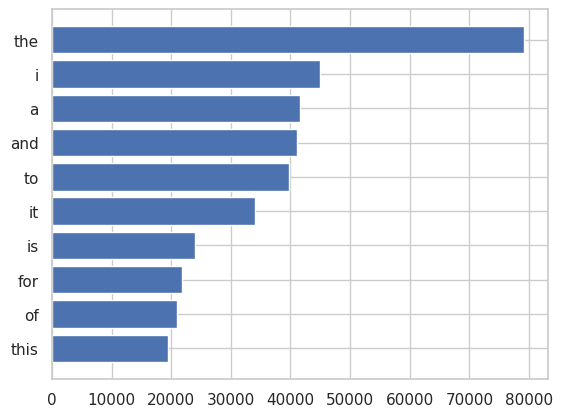

In [36]:
words = [w[0] for w in most_common_words]
freqs = [w[1] for w in most_common_words]

freqs, words = zip(*sorted(zip(freqs, words)))

plt.barh(words, freqs)
plt.show()


### 3.2. Nube de palabras

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [38]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

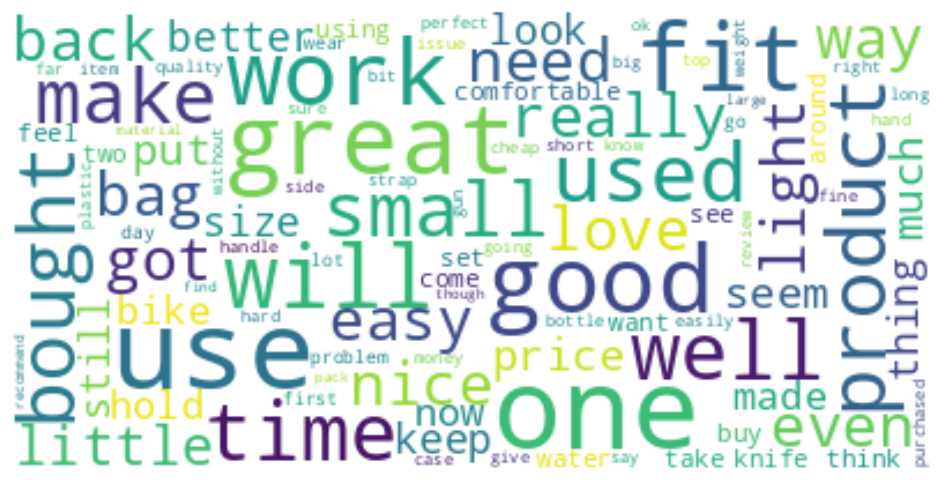

In [39]:
words_list = corpus.lower().strip().split()
plot_word_cloud(words_list)

Observamos algnas palabras interesantes que hablan de sentimientos positiviso como great, good sin enmbargo muchas otras no aportan información de sentimientos.

## 3.3. Diagrama de bigramas y trigramas

In [40]:
bg_freq_most_common = bg_freq.most_common(10)
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]

tg_freq_most_common = tg_freq.most_common(10)
tgs_ = [str(tg[0]) for tg in tg_freq_most_common]
tgs_f_ = [tg[1] for tg in tg_freq_most_common]

bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_, tgs_)))

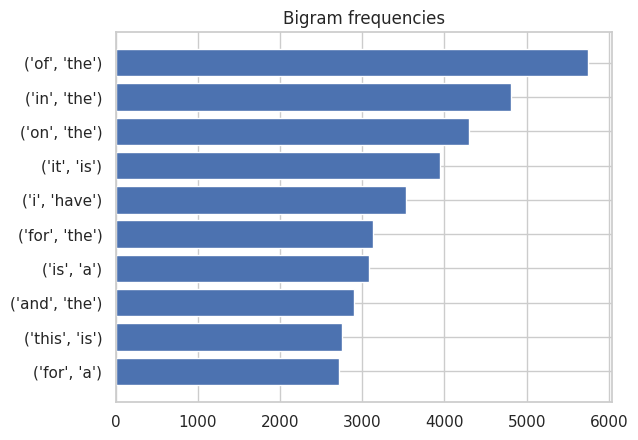

In [41]:
plt.barh(bgs_, bgs_f_)
plt.title('Bigram frequencies')
plt.show()

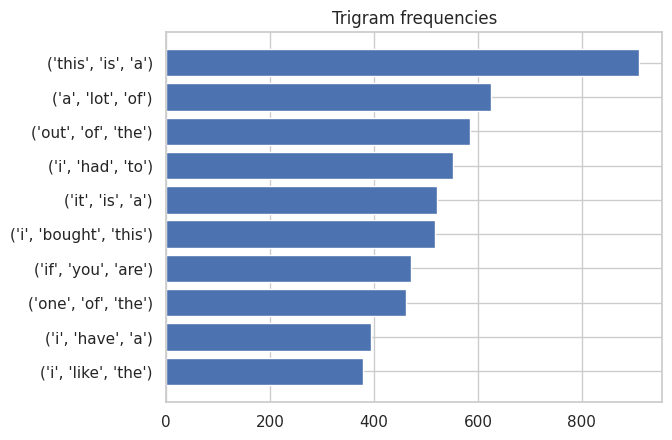

In [42]:
plt.barh(tgs_, tgs_f_)
plt.title('Trigram frequencies')
plt.show()

Los bigramas y trigramas no aportan datos sin limpiar el dataset.

## 3.4. Dispersión palabras claves


<Figure size 1500x1500 with 0 Axes>

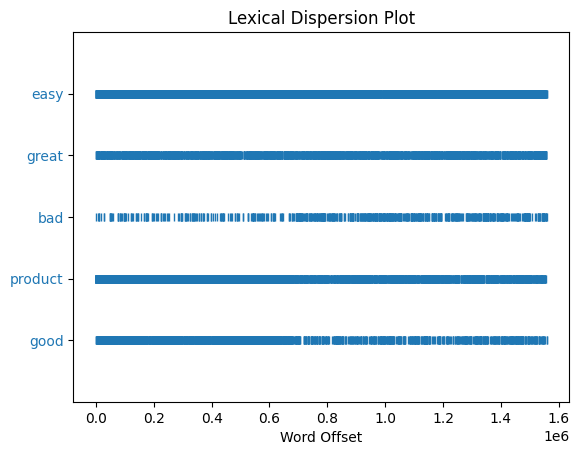

In [43]:
import matplotlib.pyplot as plt
from nltk.draw.dispersion import dispersion_plot

target_words = ['good',
                'product',
                'bad',
                'great',
                'easy']

plt.figure(figsize=(15, 15))
plt.style.use('default')
dispersion_plot(words_list, target_words, ignore_case=True)
plt.show()

# 4. RECONOCIMIENTO DE ENTIDADES NOMBRADAS(NER)

Vamos a hacer un estudio de NER. Por un tema de memoria he tenido que limitar el número de tokens a estudiar a 100.000.

In [44]:
from spacy import displacy
doc = nlp(corpus[:100000])
displacy.render(doc, style='ent', jupyter=True, options={'distance':100})

In [45]:
print('{0:10}{1:10}'.format('Token', 'Entity Label'))
for entity in doc.ents:
    print('{0:10}{1:10}'.format(entity.text, entity.label_))

Token     Entity Label
5 days    DATE      
a few daysDATE      
XLL       ORG       
6'10      CARDINAL  
15        CARDINAL  
two       CARDINAL  
all day   DATE      
10 years agoDATE      
Hockey    ORG       
five      CARDINAL  
15 minutesTIME      
20        CARDINAL  
/50       PRODUCT   
10 year oldDATE      
Code      PERSON    
7000      CARDINAL  
History Channels AloneORG       
The Kryptonite SeriesEVENT     
unscrews  ORG       
one       CARDINAL  
Barnett Raptor FXORG       
330       CARDINAL  
10 and 20 yardsTIME      
several inchesQUANTITY  
one       CARDINAL  
up to 23 milesQUANTITY  
about 1400 milesQUANTITY  
first     ORDINAL   
two       CARDINAL  
MTB       ORG       
Bungee    LOC       
over a yearDATE      
1300 milesQUANTITY  
Trail     GPE       
one       CARDINAL  
one       CARDINAL  
the Noah 9LAW       
First     ORDINAL   
Amazon    ORG       
6         CARDINAL  
Kelty     ORG       
7         CARDINAL  
only two  CARDINAL  
7         CARDINAL  


Hay muchos datos numéricos que no aportan información.

# 4. EMBEDDINGS

## 4.1. Carga de datos

In [2]:
import pandas as pd
data_sports = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/df_sports_subset2.csv')

In [3]:
data_sports.shape

(30000, 2)

In [4]:
data_sports.head()

,sentimiento,review
0,4.0,Perfect size to fit in an emergency preparedne...
1,4.0,Great but wears out pretty quick if used a lot...
2,5.0,Great item that is superbly inexpensive for it...
3,5.0,This is a sturdily built portable practice net...
4,4.0,works good


In [5]:
data_sports.isnull().sum()

sentimiento    0
review         0
dtype: int64

## 4.1. Limpieza

In [6]:
import pandas as pd
import spacy
import re

from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.models.phrases import Phrases, Phraser

from collections import defaultdict

from time import time
import logging  # Configuración de loggings para monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)





In [7]:
# FUNCION DE LIMPIEZA
nlp = spacy.load("en_core_web_sm")
def cleaning(doc):
    #Lematizar y quitar stop words
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Eliminar tokes con longitud menor a 2
    if len(txt) > 2:
        return ' '.join(txt)

In [8]:
review_clean = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in data_sports['review'])

In [9]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(review_clean, batch_size=5000)]

print('Tiempo para limpiar todo: {} mins'.format(round((time() - t) / 60, 2)))

Tiempo para limpiar todo: 4.16 mins


Organizar el resultado en un data frame,tratando los posibles valores faltantes y duplicados.

In [10]:
df_clean_sports = pd.DataFrame({'clean': txt})
df_clean_sports = df_clean_sports.dropna().drop_duplicates()
df_clean_sports.shape

(26393, 1)

In [11]:
df_clean_sports.head()

,clean
0,perfect size fit emergency preparedness backpa...
1,great wear pretty quick lot rinse son swim day...
2,great item superbly inexpensive performance
3,sturdily build portable practice net change re...
5,get xll fit ' able adjust comfortable fit foot...


## 4.2. Guardar archivo limpio

In [12]:
df_clean_sports.to_csv('/content/drive/MyDrive/keepcoding_NLP/df_clean_sports2.csv')

## 4.3. Entrenar el modelo

In [13]:
import multiprocessing

from gensim.models import Word2Vec

### 4.3.1 Número de cores en el ordenador

In [14]:
cores = multiprocessing.cpu_count()
print (cores)

2


### 4.3.2. Definir hiperparámetros

In [15]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=100,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

### 4.3.3. Construir vocabulario.

In [16]:
t = time()
sent = [row.split() for row in df_clean_sports['clean']]
w2v_model.build_vocab(sent, progress_per=10000)

print('Tiempo para construir el vocabulario: {} mins'.format(round((time() - t) / 60, 2)))

Tiempo para construir el vocabulario: 0.01 mins


In [17]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v_model.wv.key_to_index)))

Vocabulario compuesto por 3110 palabras


### 4.3.4. Entrenar modelo word2Vect


In [18]:
t = time()

w2v_model.train(sent, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)


print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.77 mins


### 4.3.5. Guardar modelo

In [19]:
w2v_model.save('/content/drive/MyDrive/keepcoding_NLP/w2v_model_reviews2.pkl')

## 4.4. Resultados

### 4.4.1 Visualizacion de palabras similares.

In [20]:
w2v_model.wv.most_similar(positive=["great"])

[('good', 0.7369378209114075),
 ('excellent', 0.6968346238136292),
 ('awesome', 0.6553794741630554),
 ('perfect', 0.6318804621696472),
 ('nice', 0.6203129887580872),
 ('decent', 0.6062015295028687),
 ('love', 0.5651817917823792),
 ('terrific', 0.4935825765132904),
 ('fantastic', 0.4910467565059662),
 ('well', 0.4715947210788727)]

In [21]:
w2v_model.wv.most_similar(positive=["bad"])

[('horrible', 0.5623049736022949),
 ('terrible', 0.5523545145988464),
 ('defect', 0.5478938221931458),
 ('unusable', 0.5452736020088196),
 ('unacceptable', 0.5411092042922974),
 ('nasty', 0.5322823524475098),
 ('news', 0.5270364284515381),
 ('batch', 0.5134397745132446),
 ('smell', 0.4955529272556305),
 ('manufacturing', 0.48752230405807495)]

In [22]:
w2v_model.wv.most_similar(positive=["product"])

[('hype', 0.6454936861991882),
 ('prompt', 0.6150789856910706),
 ('response', 0.6081405878067017),
 ('company', 0.6072788238525391),
 ('inferior', 0.5771175026893616),
 ('reply', 0.5553895235061646),
 ('consumer', 0.5547497272491455),
 ('decision', 0.5538690090179443),
 ('seller', 0.5533576607704163),
 ('english', 0.5486243963241577)]

In [23]:
w2v_model.wv.most_similar(positive=["use"])

[('daily', 0.5320703387260437),
 ('usage', 0.48651233315467834),
 ('frequently', 0.4831143319606781),
 ('able', 0.4774472117424011),
 ('work', 0.4741498529911041),
 ('regularly', 0.46902310848236084),
 ('have', 0.4540889263153076),
 ('destroy', 0.45286497473716736),
 ('home', 0.44765329360961914),
 ('weekly', 0.4451654553413391)]

In [24]:
w2v_model.wv.most_similar(positive=["sport"])

[('franklin', 0.7213897109031677),
 ('coach', 0.582761287689209),
 ('softball', 0.5766998529434204),
 ('sporting', 0.5543681979179382),
 ('armour', 0.5417677760124207),
 ('team', 0.5235757231712341),
 ('swimmer', 0.5229183435440063),
 ('athletic', 0.5152305364608765),
 ('bra', 0.5112154483795166),
 ('avid', 0.5055220127105713)]

## 4.5. Clusters.

In [34]:
keys = ['bad','great','good']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [35]:
print(word_clusters)

[['horrible', 'terrible', 'defect', 'unusable', 'unacceptable', 'nasty', 'news', 'batch', 'smell', 'manufacturing'], ['good', 'excellent', 'awesome', 'perfect', 'nice', 'decent', 'love', 'terrific', 'fantastic', 'well'], ['great', 'decent', 'well', 'excellent', 'nice', 'awesome', 'like', 'superior', 'fantastic', 'job']]


## 4.6. Reducción de la dimensionalidad 2D.

In [39]:
import numpy as np
from sklearn.manifold import TSNE


tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

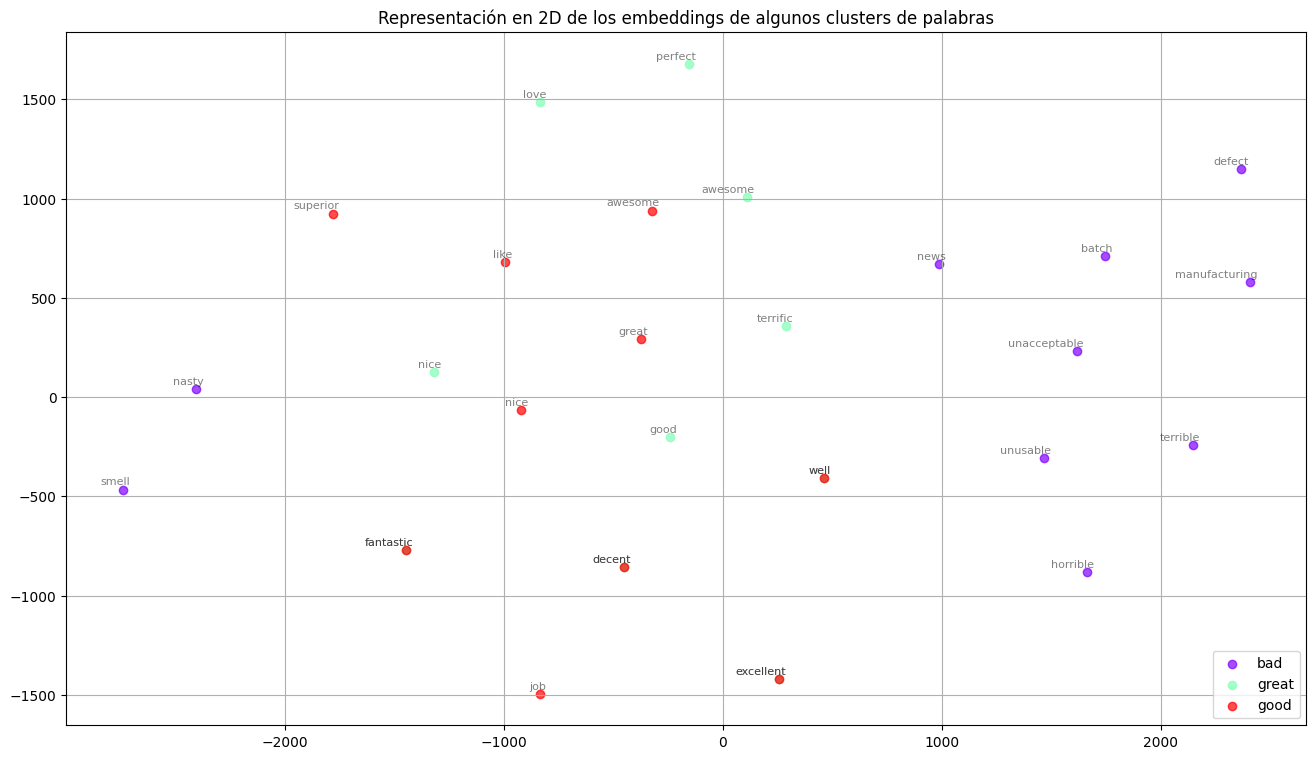

In [40]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

# 5. ANALISIS DE TOPICOS

## 5.1. Instalar librerias.

In [41]:
!pip install --upgrade gensim
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.5 MB/s eta 0:00:00


In [42]:
import pandas as pd
import numpy as np

import random
import gensim
from gensim.utils import simple_preprocess

from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import matplotlib.pyplot as plt

## 5.2. Cargar dataset

In [43]:
data_sports = pd.read_csv('/content/drive/MyDrive/keepcoding_NLP/df_sports_subset2.csv')
data_sports.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentimiento,review
0,4.0,Perfect size to fit in an emergency preparedne...
1,4.0,Great but wears out pretty quick if used a lot...
2,5.0,Great item that is superbly inexpensive for it...
3,5.0,This is a sturdily built portable practice net...
4,4.0,works good


In [44]:
data_topic = data_sports['review']
data_topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        Perfect size to fit in an emergency preparedne...
1        Great but wears out pretty quick if used a lot...
2        Great item that is superbly inexpensive for it...
3        This is a sturdily built portable practice net...
4                                               works good
                               ...                        
29995    Does not match description at all!!!  No handl...
29996                                          Basic rings
29997    Although I've only purchased one of these kniv...
29998                                            to flimsy
29999    I sent it back and bought an EOtech 512 , I co...
Name: review, Length: 30000, dtype: object

## 5.3. Preprocesado

Función de preprocesado.

In [45]:
def text_preprocessing(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
processed_texts = []
for text in data_topic:
    processed_texts.append(text_preprocessing(text))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
processed_texts[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['perfect',
  'size',
  'emergency',
  'preparedness',
  'backpack',
  'started',
  'come',
  'handy',
  'camping',
  'trips'],
 ['great',
  'wears',
  'pretty',
  'quick',
  'rinsed',
  'swims',
  'days',
  'week',
  'replace',
  'months'],
 ['great', 'item', 'superbly', 'inexpensive', 'performance'],
 ['sturdily',
  'built',
  'portable',
  'practice',
  'changing',
  'review',
  'based',
  'days',
  'stand',
  'fine',
  'tent',
  'stakes',
  'purchase',
  'feel',
  'better',
  'product',
  'came',
  'tent',
  'stakes'],
 ['works', 'good'],
 ['able',
  'adjust',
  'comfortable',
  'feet',
  'size',
  'upper',
  'limit',
  'booties',
  'able',
  'wear',
  'pairs',
  'socks',
  'stay',
  'warm',
  'river',
  'twice',
  'complaints',
  'great',
  'value',
  'needed'],
 ['great',
  'product',
  'easy',
  'little',
  'bulky',
  'stretches',
  'time',
  'tightened',
  'best',
  'solution',
  'price',
  'prompt',
  'shipping'],
 ['works', 'great', 'home'],
 ['good', 'price', 'thanks'],
 []

## 5.4. Crear diccionario.

In [48]:
dictionary = Dictionary(processed_texts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
list(dictionary.items())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 'backpack'),
 (1, 'camping'),
 (2, 'come'),
 (3, 'emergency'),
 (4, 'handy'),
 (5, 'perfect'),
 (6, 'preparedness'),
 (7, 'size'),
 (8, 'started'),
 (9, 'trips'),
 (10, 'days'),
 (11, 'great'),
 (12, 'months'),
 (13, 'pretty'),
 (14, 'quick'),
 (15, 'replace'),
 (16, 'rinsed'),
 (17, 'swims'),
 (18, 'wears'),
 (19, 'week'),
 (20, 'inexpensive'),
 (21, 'item'),
 (22, 'performance'),
 (23, 'superbly'),
 (24, 'based'),
 (25, 'better'),
 (26, 'built'),
 (27, 'came'),
 (28, 'changing'),
 (29, 'feel'),
 (30, 'fine'),
 (31, 'portable'),
 (32, 'practice'),
 (33, 'product'),
 (34, 'purchase'),
 (35, 'review'),
 (36, 'stakes'),
 (37, 'stand'),
 (38, 'sturdily'),
 (39, 'tent'),
 (40, 'good'),
 (41, 'works'),
 (42, 'able'),
 (43, 'adjust'),
 (44, 'booties'),
 (45, 'comfortable'),
 (46, 'complaints'),
 (47, 'feet'),
 (48, 'limit'),
 (49, 'needed'),
 (50, 'pairs'),
 (51, 'river'),
 (52, 'socks'),
 (53, 'stay'),
 (54, 'twice'),
 (55, 'upper'),
 (56, 'value'),
 (57, 'warm'),
 (58, 'wear'),
 (59, 

Longitud del diccionario.

In [50]:
print('La longitud del diccionario es: ', len(dictionary))

La longitud del diccionario es:  24589


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 5.5. Crear el corpus.

In [51]:
corpus = [dictionary.doc2bow(doc) for doc in processed_texts]
corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1)],
 [(11, 1), (20, 1), (21, 1), (22, 1), (23, 1)],
 [(10, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 2)],
 [(40, 1), (41, 1)],
 [(7, 1),
  (11, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1)],
 [(11, 1),
  (33, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1)],
 [(11, 1), (41, 1), (70, 1)],
 [(40, 1), (63, 1), (71, 1)],
 [],
 [(4, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1)],
 [(7, 1),
  (6

## 5.6. Encontrar el número de topicos mejor.

In [52]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):

        # Build LDA model
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics)

        # Create a list of LDA models
        model_list.append(model)

        # Compute the Coherence for each model
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


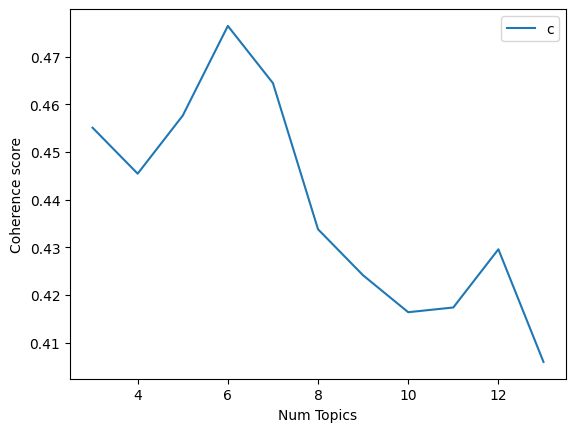

In [53]:
start_ = 3
end_ = 14
step_ = 1

model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_texts,
    start=start_,
    limit=end_,
    step=step_
)

x = range(start_, end_, step_)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

El número  mejor de topicos es 6.

## 5.7. Entrenar modelo con el número de topicos optimo.

In [54]:
num_topics = 6

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=5,
    passes=10,
    alpha='auto'
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 5.8. Metricas del modelo.

In [55]:
# Perplexity (más bajo)
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # Medida de qué tan bueno es el modelo. Cuanto más bajo, mejor

# Coherence Score (coherencia en el número de temas entre 0 y 1)
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -8.149863065495074

Coherence Score:  0.46438084825150594


## 5.9. Visualización de las palabras incluidas en cada tópico.

In [56]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06
0,love,light,scope,good,water,size
1,strap,bike,mount,great,bottle,like
2,pack,time,sight,quality,year,small
3,straps,plastic,lock,product,perfect,wear
4,inside,item,range,like,ball,tight
5,head,broke,pump,price,like,large
6,small,line,rifle,bought,kids,comfortable
7,tent,amazon,thing,works,time,feel
8,carry,seat,problem,nice,bottles,material
9,camping,months,screw,work,balls,holster


In [57]:
# Visualizar los topics
#!pip install pandas==1.5.3
pyLDAvis.enable_notebook ()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.153497  0.111134       1        1  24.091705
5     -0.158211 -0.062470       2        1  18.915366
1      0.161889 -0.102672       3        1  18.021859
2      0.101591 -0.216434       4        1  16.523932
0     -0.141452  0.016648       5        1  13.429785
4      0.189679  0.253794       6        1   9.017353, topic_info=           Term         Freq        Total Category  logprob  loglift
40         good  5721.000000  5721.000000  Default  30.0000  30.0000
11        great  4404.000000  4404.000000  Default  29.0000  29.0000
322       water  2227.000000  2227.000000  Default  28.0000  28.0000
113     quality  2984.000000  2984.000000  Default  27.0000  27.0000
7          size  2617.000000  2617.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1408      hours   212.246155   481.906238   Topic6  -5.5176   1.5860
324      amazon   231.544648  1012.932263   Topic6  -5.4306   0.9302
940     plastic   222.004774  1632.336285   Topic6  -5.4727   0.4110
622   purchased   216.006339  1066.967455   Topic6  -5.5001   0.8088
35       review   208.645298   846.177319   Topic6  -5.5347   1.0059

[342 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2192      4  0.996999    accurate
2098      6  0.996851       adult
1206      1  0.998049  advertised
324       1  0.072068      amazon
324       2  0.020732      amazon
...     ...       ...         ...
128       6  0.726220        year
2287      5  0.997192        yoga
1819      4  0.996161        zero
1512      5  0.997718      zipper
1773      5  0.997756     zippers

[636 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 2, 3, 1, 5])

# CONCLUSIONES